In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [20]:
data = pd.read_csv("water_preprocessed.csv")
data.columns

Index(['Unnamed: 0', 'STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'DO', 'PH',
       'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year', 'WQI',
       'WQI clf'],
      dtype='object')

In [25]:
df = data.groupby("STATE")['WQI clf'].median().reset_index()
# df['STATE'] = df['STATE'].replace(["Arunachal Pradesh"])

In [22]:
shp_gdf = gpd.read_file('India_States/Indian_states.shp')
shp_gdf.columns

Index(['st_nm', 'geometry'], dtype='object')

In [26]:
merged = shp_gdf.set_index('st_nm').join(df.set_index('STATE'))
merged.head()

,geometry,WQI clf
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",NaN
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",NaN
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",1.0


In [32]:
merged['WQI clf'] = merged['WQI clf'].fillna(0)
merged

,geometry,WQI clf
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",0.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",0.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",1.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",0.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",1.0
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",2.0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",2.0


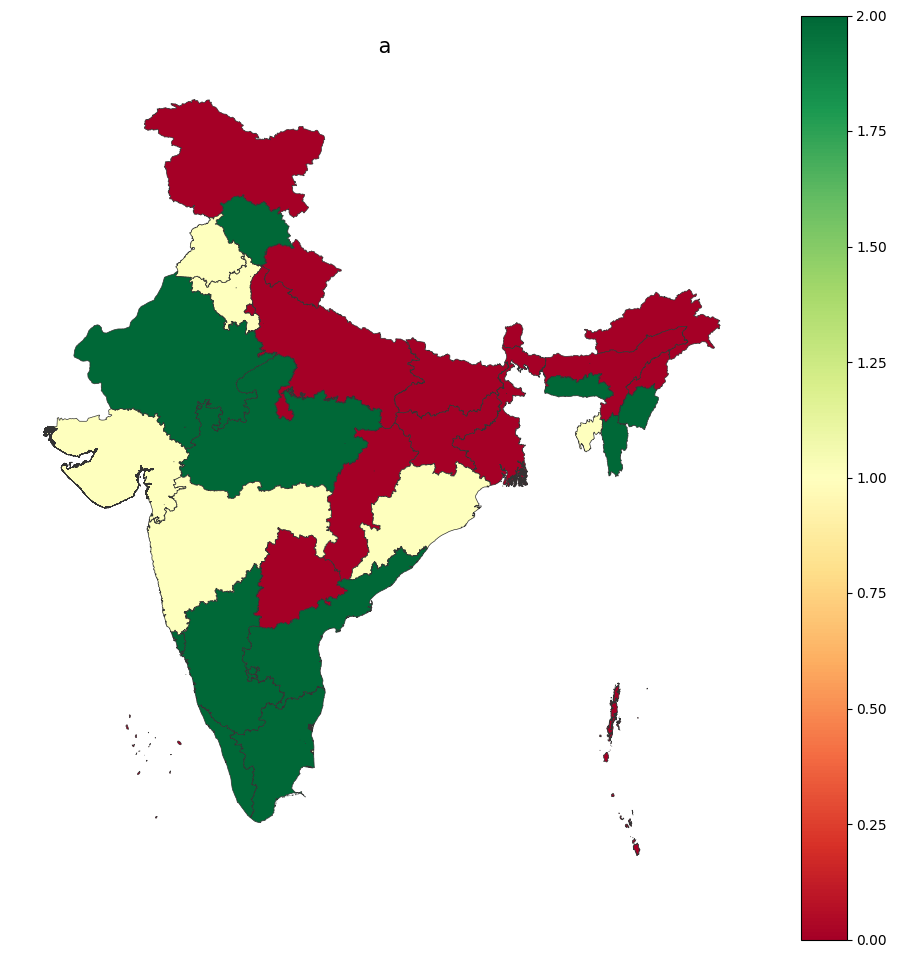

In [33]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Water ',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='WQI clf', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)